# Imports and Function definitions

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import naive_bayes, neighbors, tree, model_selection, metrics, preprocessing
import warnings
warnings.filterwarnings('ignore')

def preprocess(data):
    x = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    features_to_be_scaled = x.select_dtypes(exclude=['O']).columns.tolist()
    if set(x.columns.tolist()) - set(features_to_be_scaled):
        x[features_to_be_scaled] = preprocessing.scale(x[features_to_be_scaled])
    x = pd.get_dummies(x)
    x = x.to_numpy()
    y = y.to_numpy()
    return x, y

def classifier(model, data, test_size, iters):
    accuracy = np.empty(iters)
    x, y = preprocess(data)
    for i in range(iters):
        x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = test_size)
        model = model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy[i] = metrics.accuracy_score(y_test, y_pred)
#         print(metrics.confusion_matrix(y_test, y_pred))
    return np.mean(accuracy)

# Models and Test Sizes

In [2]:
models = [naive_bayes.GaussianNB(), neighbors.KNeighborsClassifier(), tree.DecisionTreeClassifier()]
test_sizes = [0.25, 0.33]

# Loading Artificial Characters dataset and preprocessing

In [3]:
x_train = pd.read_csv('Datasets/artificialChars/x_train', sep=' ', header=None)
x_test = pd.read_csv('Datasets/artificialChars/x_test', sep=' ', header=None)
del x_train[x_train.columns[-1]]
del x_test[x_test.columns[-1]]
x_test_train = x_train.append(x_test)
y_train = pd.read_csv('Datasets/artificialChars/y_train', sep=' ', header=None)
y_test = pd.read_csv('Datasets/artificialChars/y_test', sep=' ', header=None)
y_test_train = y_train.append(y_test)
y_test_train = y_test_train.idxmax(axis = 1)
x_test_train['Target'] = y_test_train
charsColumns = x_test_train.columns.tolist()
chars = x_test_train[charsColumns[-1:] + charsColumns[:-1]]

# Plotting a random image from the Artificial Characters dataset

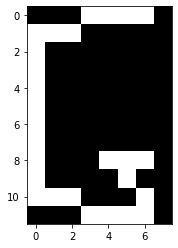

G


In [4]:
index = 400
plt.imshow(x_train.loc[index].values.reshape(12, 8), cmap='gray')
plt.show()
characters = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'L', 'R']
print(characters[np.argmax(y_train.loc[index].values)])

# Loading Abalone dataset and preprocessing

In [5]:
abalone = pd.read_csv('Datasets/abalone.data', header=None)
abalone_columns = abalone.columns.tolist()
abalone = abalone[abalone_columns[-1:] + abalone_columns[:-1]]

# Loading Breast Cancer Wisconsin dataset and preprocessing

In [6]:
breast_cancer = pd.read_csv('Datasets/breast_cancer.data', header=None, index_col=[0])
breast_cancer[1] = breast_cancer[1].map({'M':0, 'B':1})

# Hold Out

## Breast Cancer

In [7]:
result = pd.DataFrame(columns=test_sizes, index=['Naive Bayes', 'KNN', 'Decision Tree'])
for i in range(len(test_sizes)):
    for j in range(len(models)):
        result.iloc[j, i] = classifier(models[j], breast_cancer, test_sizes[i], 1)
result

,0.25,0.33
Naive Bayes,0.923077,0.909574
KNN,0.937063,0.946809
Decision Tree,0.909091,0.920213


## Abalone

In [8]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        result.iloc[j, i] = classifier(models[j], abalone, test_sizes[i], 1)
result

,0.25,0.33
Naive Bayes,0.113876,0.1095
KNN,0.218182,0.234228
Decision Tree,0.220096,0.202321


## Artificial Characters

In [9]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        result.iloc[j, i] = classifier(models[j], chars, test_sizes[i], 1)
result

,0.25,0.33
Naive Bayes,0.832593,0.839506
KNN,0.923704,0.909652
Decision Tree,0.966667,0.962963


# Random Subsampling

## Breast Cancer

In [10]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        result.iloc[j, i] = classifier(models[j], breast_cancer, test_sizes[i], 10)
result

,0.25,0.33
Naive Bayes,0.941259,0.932979
KNN,0.928671,0.932979
Decision Tree,0.929371,0.935106


## Abalone

In [11]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        result.iloc[j, i] = classifier(models[j], abalone, test_sizes[i], 10)
result

,0.25,0.33
Naive Bayes,0.103636,0.107107
KNN,0.220957,0.214866
Decision Tree,0.201244,0.19884


## Artificial Characters

In [12]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        result.iloc[j, i] = classifier(models[j], chars, test_sizes[i], 10)
result

,0.25,0.33
Naive Bayes,0.833037,0.830808
KNN,0.907926,0.905387
Decision Tree,0.96437,0.968013


# Cross Validation

## Breast Cancer

In [13]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        x, y = preprocess(breast_cancer)
        result.iloc[j, i] = model_selection.cross_val_score(models[j], x, y, cv=int(1/test_sizes[i])).mean()
result

,0.25,0.33
Naive Bayes,0.942049,0.936749
KNN,0.927989,0.922668
Decision Tree,0.919199,0.919131


## Abalone

In [14]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        x, y = preprocess(abalone)
        result.iloc[j, i] = model_selection.cross_val_score(models[j], x, y, cv=int(1/test_sizes[i])).mean()
result

,0.25,0.33
Naive Bayes,0.106542,0.105583
KNN,0.218104,0.228394
Decision Tree,0.192969,0.193203


## Artificial Characters

In [15]:
for i in range(len(test_sizes)):
    for j in range(len(models)):
        x, y = preprocess(chars)
        result.iloc[j, i] = model_selection.cross_val_score(models[j], x, y, cv=int(1/test_sizes[i])).mean()
result

,0.25,0.33
Naive Bayes,0.829259,0.826481
KNN,0.906481,0.903333
Decision Tree,0.967037,0.966481
